# Superpixel generation and groundtruth augmentation

This notebook allows to run the superpixel generation and groundtruth augmentation piece by piece.

*In Litterature*:
    
- start with 1500 and decrease by 80% at each iteration
- start with 10x the number of labelled pixels, end with the 10th of labelled pixels
- start with 5000 to 300, 30 levels

## Importing necessary libraries

In [1]:
from collections import Counter
from imutils import paths
from skimage import io
import argparse
import csv
import cv2
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
import os

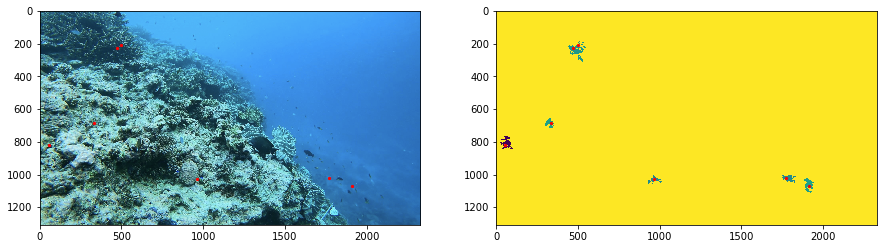

In [95]:
os.chdir('/data/jantina/Superpixels/Datasets/Test/')
im = io.imread("images/test/10A-Copy1.png")
mask = io.imread("labels/test/10A-Copy1.png")
mask[mask==255]=0

os.chdir('/data/jantina/Superpixels/Test/augmented_GT/')
superpixel = io.imread("test/10A-Copy1.png")
fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].imshow(im)
ax[0].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
ax[1].imshow(superpixel)
ax[1].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
plt.show()

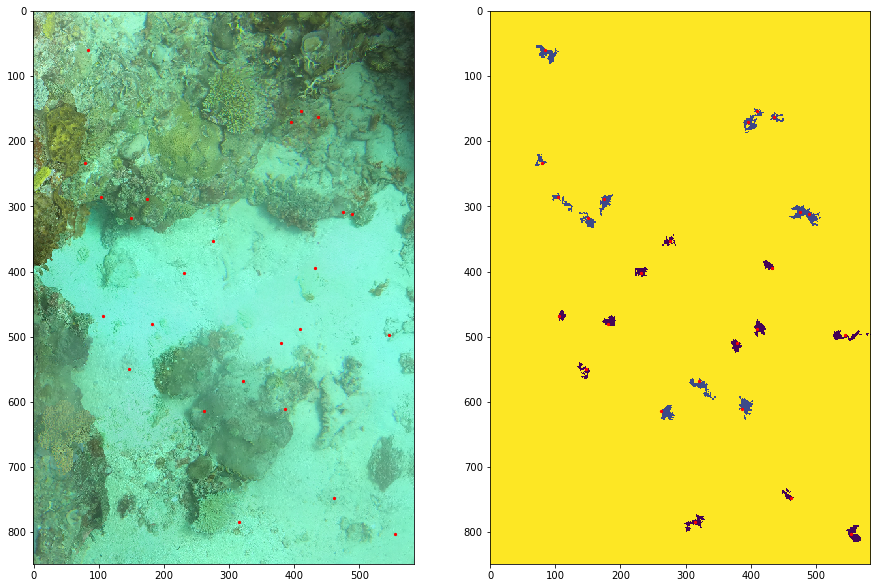

In [96]:
os.chdir('/data/jantina/Superpixels/Datasets/Test/')
im = io.imread("images/test/BH10_T1-001-Copy1.png")
mask = io.imread("labels/test/BH10_T1-001-Copy1.png")
mask[mask==255]=0

os.chdir('/data/jantina/Superpixels/Test/augmented_GT/')
superpixel = io.imread("test/BH10_T1-001-Copy1.png")
fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].imshow(im)
ax[0].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
ax[1].imshow(superpixel)
ax[1].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
plt.show()

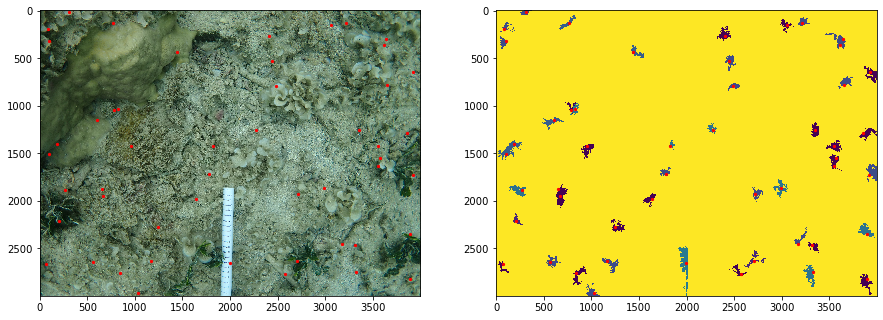

In [97]:
os.chdir('/data/jantina/Superpixels/Datasets/Test/')
im = io.imread("images/train/2020-08-10-AGAT-A-T5 6-Copy1.5-B (P8103499).JPG")
mask = io.imread("labels/train/2020-08-10-AGAT-A-T5 6-Copy1.5-B (P8103499).png")
mask[mask==255]=0

os.chdir('/data/jantina/Superpixels/Test/augmented_GT/')
superpixel = io.imread("train/2020-08-10-AGAT-A-T5 6-Copy1.5-B (P8103499).png")
fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].imshow(im)
ax[0].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
ax[1].imshow(superpixel)
ax[1].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
plt.show()

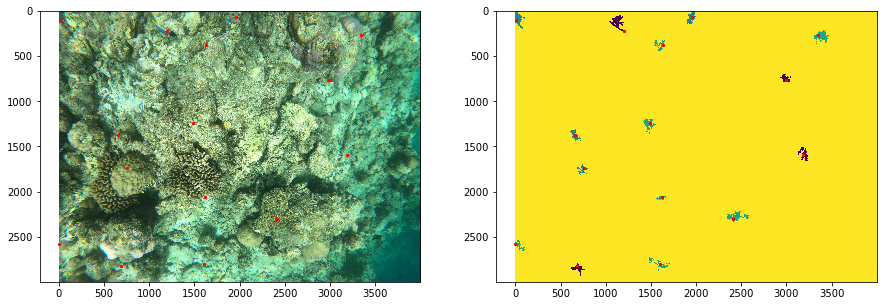

In [98]:
os.chdir('/data/jantina/Superpixels/Datasets/Test/')
im = io.imread("images/train/KY-M1GOPR0778-Copy1.JPG")
mask = io.imread("labels/train/KY-M1GOPR0778-Copy1.png")
mask[mask==255]=0

os.chdir('/data/jantina/Superpixels/Test/augmented_GT/')
superpixel = io.imread("train/KY-M1GOPR0778-Copy1.png")
fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].imshow(im)
ax[0].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
ax[1].imshow(superpixel)
ax[1].scatter(np.nonzero(mask)[1], np.nonzero(mask)[0], s=20, marker='.', c='r')
plt.show()

## Configuration

In [13]:
# value of non-labeled pixels
DEFAULT_VALUE = int(255)

# number of max iterations
NL = int(30)

# number of superpixels in the first iteration
start_superpixels = int(500)

# number of superpixels in the last iteration
last_superpixels = int(200)

In [14]:
csv_sizes = []
reduction_factor = math.pow(float(last_superpixels) / start_superpixels, 1. / (NL - 1))
for level in range(NL):
    csv_sizes = csv_sizes + [int(round(start_superpixels * math.pow(reduction_factor, level)))]

In [15]:
%rm -rf /data/jantina/Superpixels/WAPA_Interns1/superpixels
%rm -rf /data/jantina/Superpixels/WAPA_Interns1/augmented_GT

## Which dataset chunk

In [16]:
dataset = '/data/jantina/Superpixels/Datasets/WAPA_Interns1'

sparse_dir = os.path.join('/data/jantina/Superpixels/WAPA_Interns1/sparse_GT')
out_dir = os.path.join('/data/jantina/Superpixels/WAPA_Interns1/augmented_GT')
superpixels_dir = os.path.join('/data/jantina/Superpixels/WAPA_Interns1/superpixels')

folders = ['test', 'train']

### Execute superpixel generation

In [ ]:
size_sup_string = " "
for size in csv_sizes:
    size_sup_string = size_sup_string + str(size) + " "

%cd /data/jantina/Superpixels/
os.system("sh /home/jantina/CoralNet/Superpixels/generate_superpixels/generate_superpixels.sh " + dataset + size_sup_string)


/data/jantina/Superpixels
889 images total ...
On average, 1.21077 seconds needed ...
1 images total ...
On average, 1.59273 seconds needed ...
889 images total ...
On average, 1.20763 seconds needed ...
1 images total ...
On average, 1.60492 seconds needed ...
889 images total ...


## Classes

In [7]:
class Superpixel:
    def __init__(self, maxlength=10000): #10000000
        self.lista_x = np.zeros([maxlength], dtype=np.int16)
        self.lista_y = np.zeros([maxlength], dtype=np.int16)
        self.lista_x[:]=-1
        self.lista_y[:]=-1
        self.index = 0

    def add(self, value_x, value_y):
        if self.index >= len(self.lista_x):
            #make it bigger
            new_size = len(self.lista_x)*10
            lista_x_new = np.zeros([new_size], dtype=np.int16)
            lista_y_new = np.zeros([new_size], dtype=np.int16)
            lista_x_new[:] = -1
            lista_y_new[:] = -1

            lista_x_new[:len(self.lista_x)] = self.lista_x
            lista_y_new[:len(self.lista_y)] = self.lista_y
            self.lista_x = lista_x_new
            self.lista_y = lista_y_new

        self.lista_x[self.index]=value_x
        self.lista_y[self.index]=value_y
        self.index += 1

    def clean(self):
        self.lista_x = self.lista_x[self.lista_x>=0]
        self.lista_y = self.lista_y[self.lista_y>=0]

In [8]:
def label_mayoria_x_y(superpixel, gt):
    '''Given a superpixel and a GT image, returns the label value of the superpixel'''
    
    # pixel label values of the superpixels
    pixel_values = gt[superpixel.lista_x.astype(int), superpixel.lista_y.astype(int)]
    # pixel label values of the superpixels excluding the default value
    values_labels = pixel_values[pixel_values < DEFAULT_VALUE]
    # returns the value which appears the most
    if len(values_labels) == 0:
        return DEFAULT_VALUE
    else:
        count = Counter(values_labels)
        return count.most_common()[0][0]

In [9]:
def image_superpixels_gt(csv_name, gt_name, n_superpixels):
    '''Given a csv file with segmentations (csv_name) and a sparse GT image (gt_name),
        returns Superpixel-augmented GT image'''
    
    print(gt_name)
    gt = cv2.imread(gt_name, 0)
    blank_image = np.zeros((gt.shape[0], gt.shape[1], 1), np.uint8)

    superpixels = {}

    for i in range(n_superpixels*2):
        superpixels[str(i)] = Superpixel()

    # for each csv segmentation file, creates the Superpixel class
    with open(csv_name, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        i = 0
        for row in spamreader:
            fila = row[0].split(',')
            fila_count = len(fila)
            for j in range(fila_count):
                superpixel_index = fila[j]
                # the pixel here is (i, j). (superpixel_index) is the segmentation which the pixel belongs to
                # add the pixel  to the Superpixel instance
                superpixels[superpixel_index].add(i, j)
            i = i + 1

    # for each superpixel, gets its label value and writes it into the image to return
    for index in range(len(superpixels)):
        superpixels[str(index)].clean()
        label_superpixel = label_mayoria_x_y(superpixels[str(index)], gt)
        blank_image[superpixels[str(index)].lista_x.astype(int), 
                    superpixels[str(index)].lista_y.astype(int)] = int(label_superpixel)

    return blank_image

In [10]:
%cd /data/jantina/Superpixels/

def generar_augmentedGT():
    for folder in folders:

        in_folder = os.path.join(sparse_dir, folder)
        out_folder = os.path.join(out_dir, folder)
        superpixels_folder = os.path.join(superpixels_dir, folder)

        if not os.path.exists(out_folder):
            os.makedirs(out_folder)
            
        print(in_folder + '/*.' + 'png')
  
        for filename in glob.glob(in_folder + '/*.' + 'png'):
            gt_name = filename.split('/')[-1]
            gt_filename = os.path.join(out_folder, gt_name)
            # for each different segmentation generated
            for index in range(len(csv_sizes)):
                print(csv_sizes[index])

                csv_name = os.path.join(superpixels_folder, 'superpixels_' + str(csv_sizes[index]),
                                        gt_name.replace('.' + 'png', '') + '.csv')

                if index == 0:
                    # creates the first one (it has to be the more detailed one, the segmentation with more segments)
                    image_gt_new = image_superpixels_gt(csv_name, filename, csv_sizes[index])
                else:
                    # mask it with the less detailed segmentations in order to fill the areas with no valid labels
                    image_gt_new_low = image_superpixels_gt(csv_name, filename, csv_sizes[index])
                    image_gt_new[image_gt_new == DEFAULT_VALUE] = image_gt_new_low[image_gt_new == DEFAULT_VALUE]
                    print(image_gt_new.shape)
                # cv2.imwrite(gt_filename.replace(gt_name, gt_name.replace('.png', '_'+str(csv_sizes[index])+'.png')),image_gt_new)

            # out_dir
            cv2.imwrite(gt_filename, image_gt_new)

/data/jantina/Superpixels


## Generate augmented groundtruth

In [11]:
generar_augmentedGT()
print('[INFO] generation completed')

/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/*.png
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
414
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
388
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
376
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/test/KY-M1GOPR0778.png
(3000, 4000, 1)
365
/data/jantina/Superpi

(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0781.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0781.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0781.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0788.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0788.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0788.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0788.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0788.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0788.png
(3000, 4000, 1)
414
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0788.png
(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0800.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0800.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0800.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0800.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0800.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0804.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0804.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0804.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0804.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0804.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0813.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0813.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0813.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0813.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0813.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0813.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0813.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0815.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0815.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M1GOPR0815.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
250
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0830.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0831.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
274
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
266
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
250
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0834.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
292
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
283
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
274
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
266
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
250
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M2GOPR0843.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
311
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
302
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
292
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
283
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
274
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
266
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
250
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0853.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
332
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
321
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
311
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
302
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
292
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
283
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
274
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
266
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
250
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0861.png
(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
353
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
342
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
332
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
321
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
311
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
302
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
292
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
283
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
274
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
266
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0866.png
(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
376
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
365
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
353
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
342
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
332
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
321
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
311
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
302
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
292
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
283
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/KY-M3GOPR0871.png
(3000, 4000, 1)
274
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
388
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
376
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
365
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
353
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
342
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
332
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
321
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
311
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
302
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0612.png
(3000, 4000, 1)
292
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
414
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
388
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
376
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
365
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
353
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
342
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
332
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
321
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0624.png
(3000, 4000, 1)
311
/data/jantina/Superpixels/Hanan_Shafeeg/

(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
414
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
388
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
376
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
365
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
353
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
342
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM.M1GOPR0634.png
(3000, 4000, 1)
332
/data/jantina/Superpixels/Hanan_Shafeeg/

484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
414
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
388
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
376
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
365
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0643.png
(3000, 4000, 1)
353
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0645.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
414
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
388
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0646.png
(3000, 4000, 1)
376
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0648.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0648.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0648.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0649.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0649.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0649.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0649.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0649.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0649.png
(3000, 4000, 1)
414
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0649.png
(3000, 4000, 1)
401
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0651.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0651.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0651.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0651.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M2GOPR0651.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0659.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0659.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0659.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0659.png
(3000, 4000, 1)
441
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0659.png
(3000, 4000, 1)
427
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0661.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0661.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0661.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0661.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0661.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0661.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0661.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0662.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0662.png
(3000, 4000, 1)
469
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0662.png
(3000, 4000, 1)
455
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
250
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0664.png
(3000, 4000, 1)
500
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0665.png
484
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/

(3000, 4000, 1)
274
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
266
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
258
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
250
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
242
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
234
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
227
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
220
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
213
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
206
/data/jantina/Superpixels/Hanan_Shafeeg/sparse_GT/train/RM-M3GOPR0667.png
(3000, 4000, 1)
200
/data/jantina/Superpixels/Hanan_Shafeeg/